# Load Dataset

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Telco Customer Churn dataset describes a fictional telecommunications (telco) company that offers home phone services and Internet services
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Examine Non-Null Count and Datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Examine Unique Values in Each Column

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Data Cleaning

In [12]:
# To make values consistent, replace 'No internet service' responses with 'No'
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[internet_cols] = df[internet_cols].replace({'No internet service': 'No'})

In [14]:
# To make values consistent, replace 'No phone service' responses with 'No'
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [16]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [20]:
# Change Contract column to have an ordinal category datatype
contract_order = ['Month-to-month', 'One year', 'Two year']
df['Contract'] = pd.Categorical(df['Contract'], categories=contract_order, ordered=True)

In [22]:
# Change PaymentMethod column to have a nominal category datatype
df['PaymentMethod'] = df['PaymentMethod'].astype('category')

In [24]:
# Replace blank values in TotalCharges with NA
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

# Convert TotalCharges to a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
# There's 11 NA values in TotalCharges
df['TotalCharges'].isna().sum()

# Drop entries containing NA values since the number is small
df = df[df['TotalCharges'].notna()]

In [28]:
# Find the unique Internet Service values
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [30]:
# Convert to columns to have nominal category datatype
columns_to_convert = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']  
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [36]:
# creating cleaned csv file 
df.to_csv('CLEANED_WA_Fn-UseC_-Telco-Customer-Churn.csv', index=False)

# Data Visualization for Categorical Variables

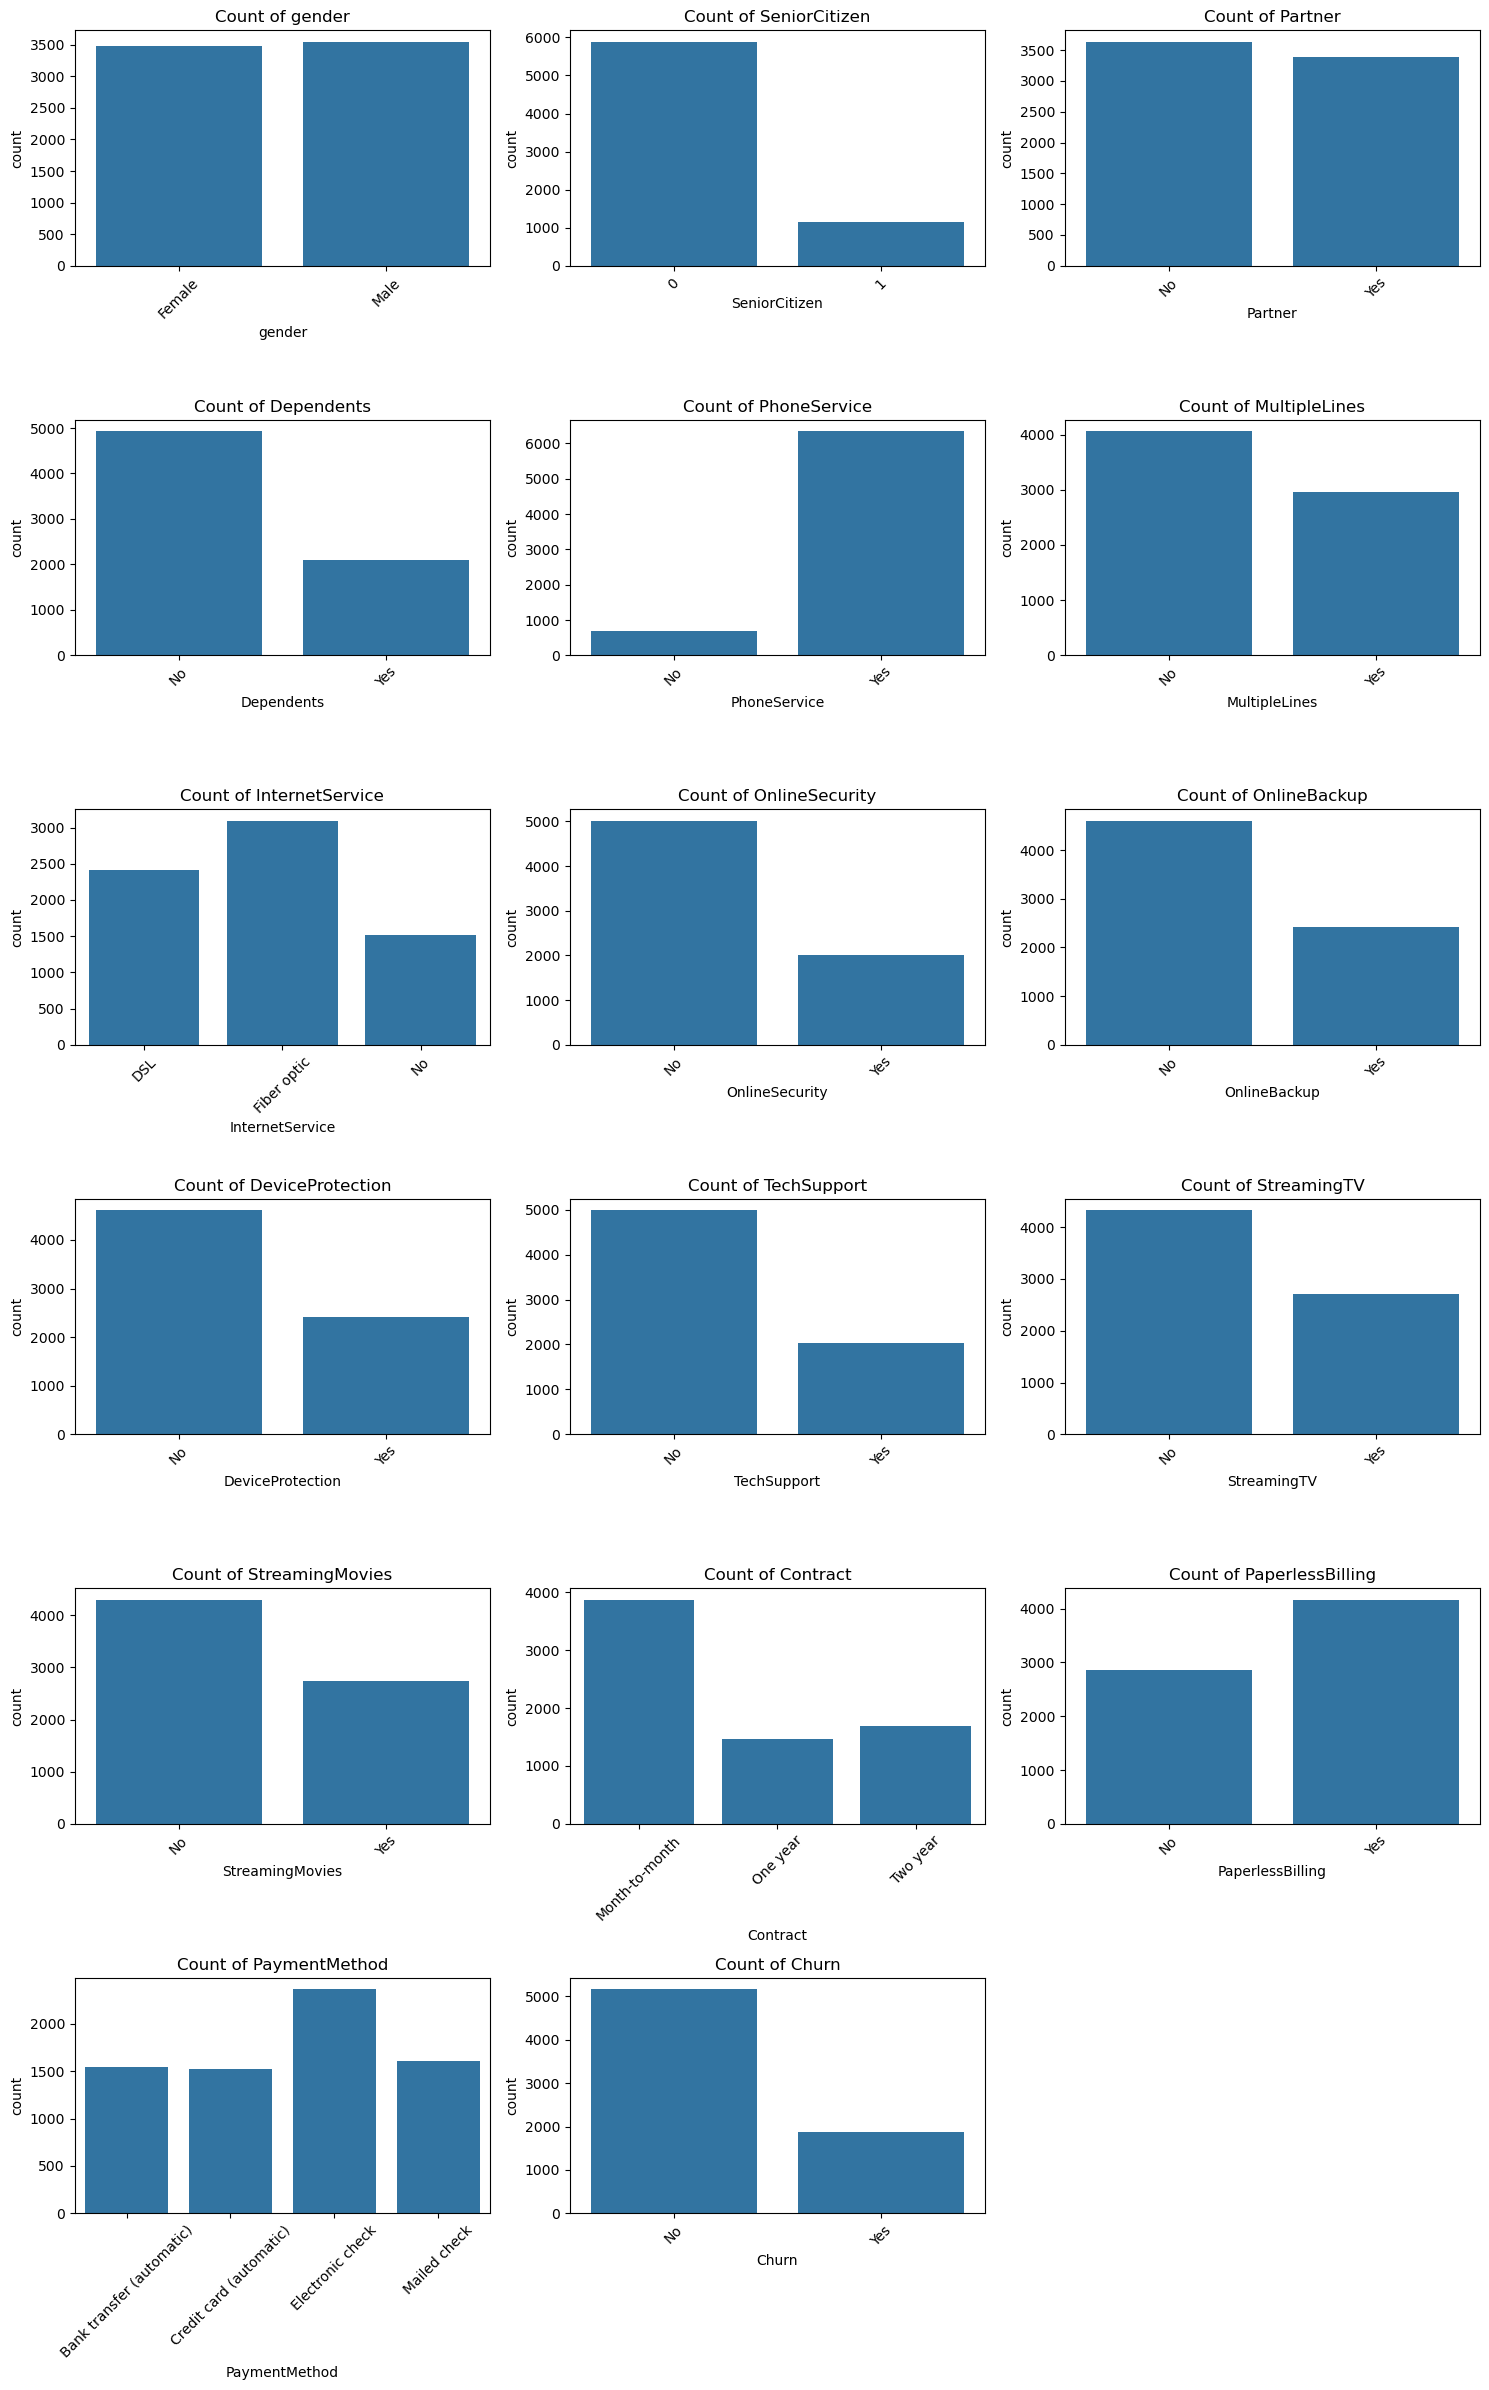

In [67]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Total number of plots
n = len(categorical_columns)

# Number of columns per row
ncols = 3

# Number of rows needed
nrows = math.ceil(n / ncols)

# plot each categorical variable
plt.figure(figsize=(ncols * 5, nrows * 4))  
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

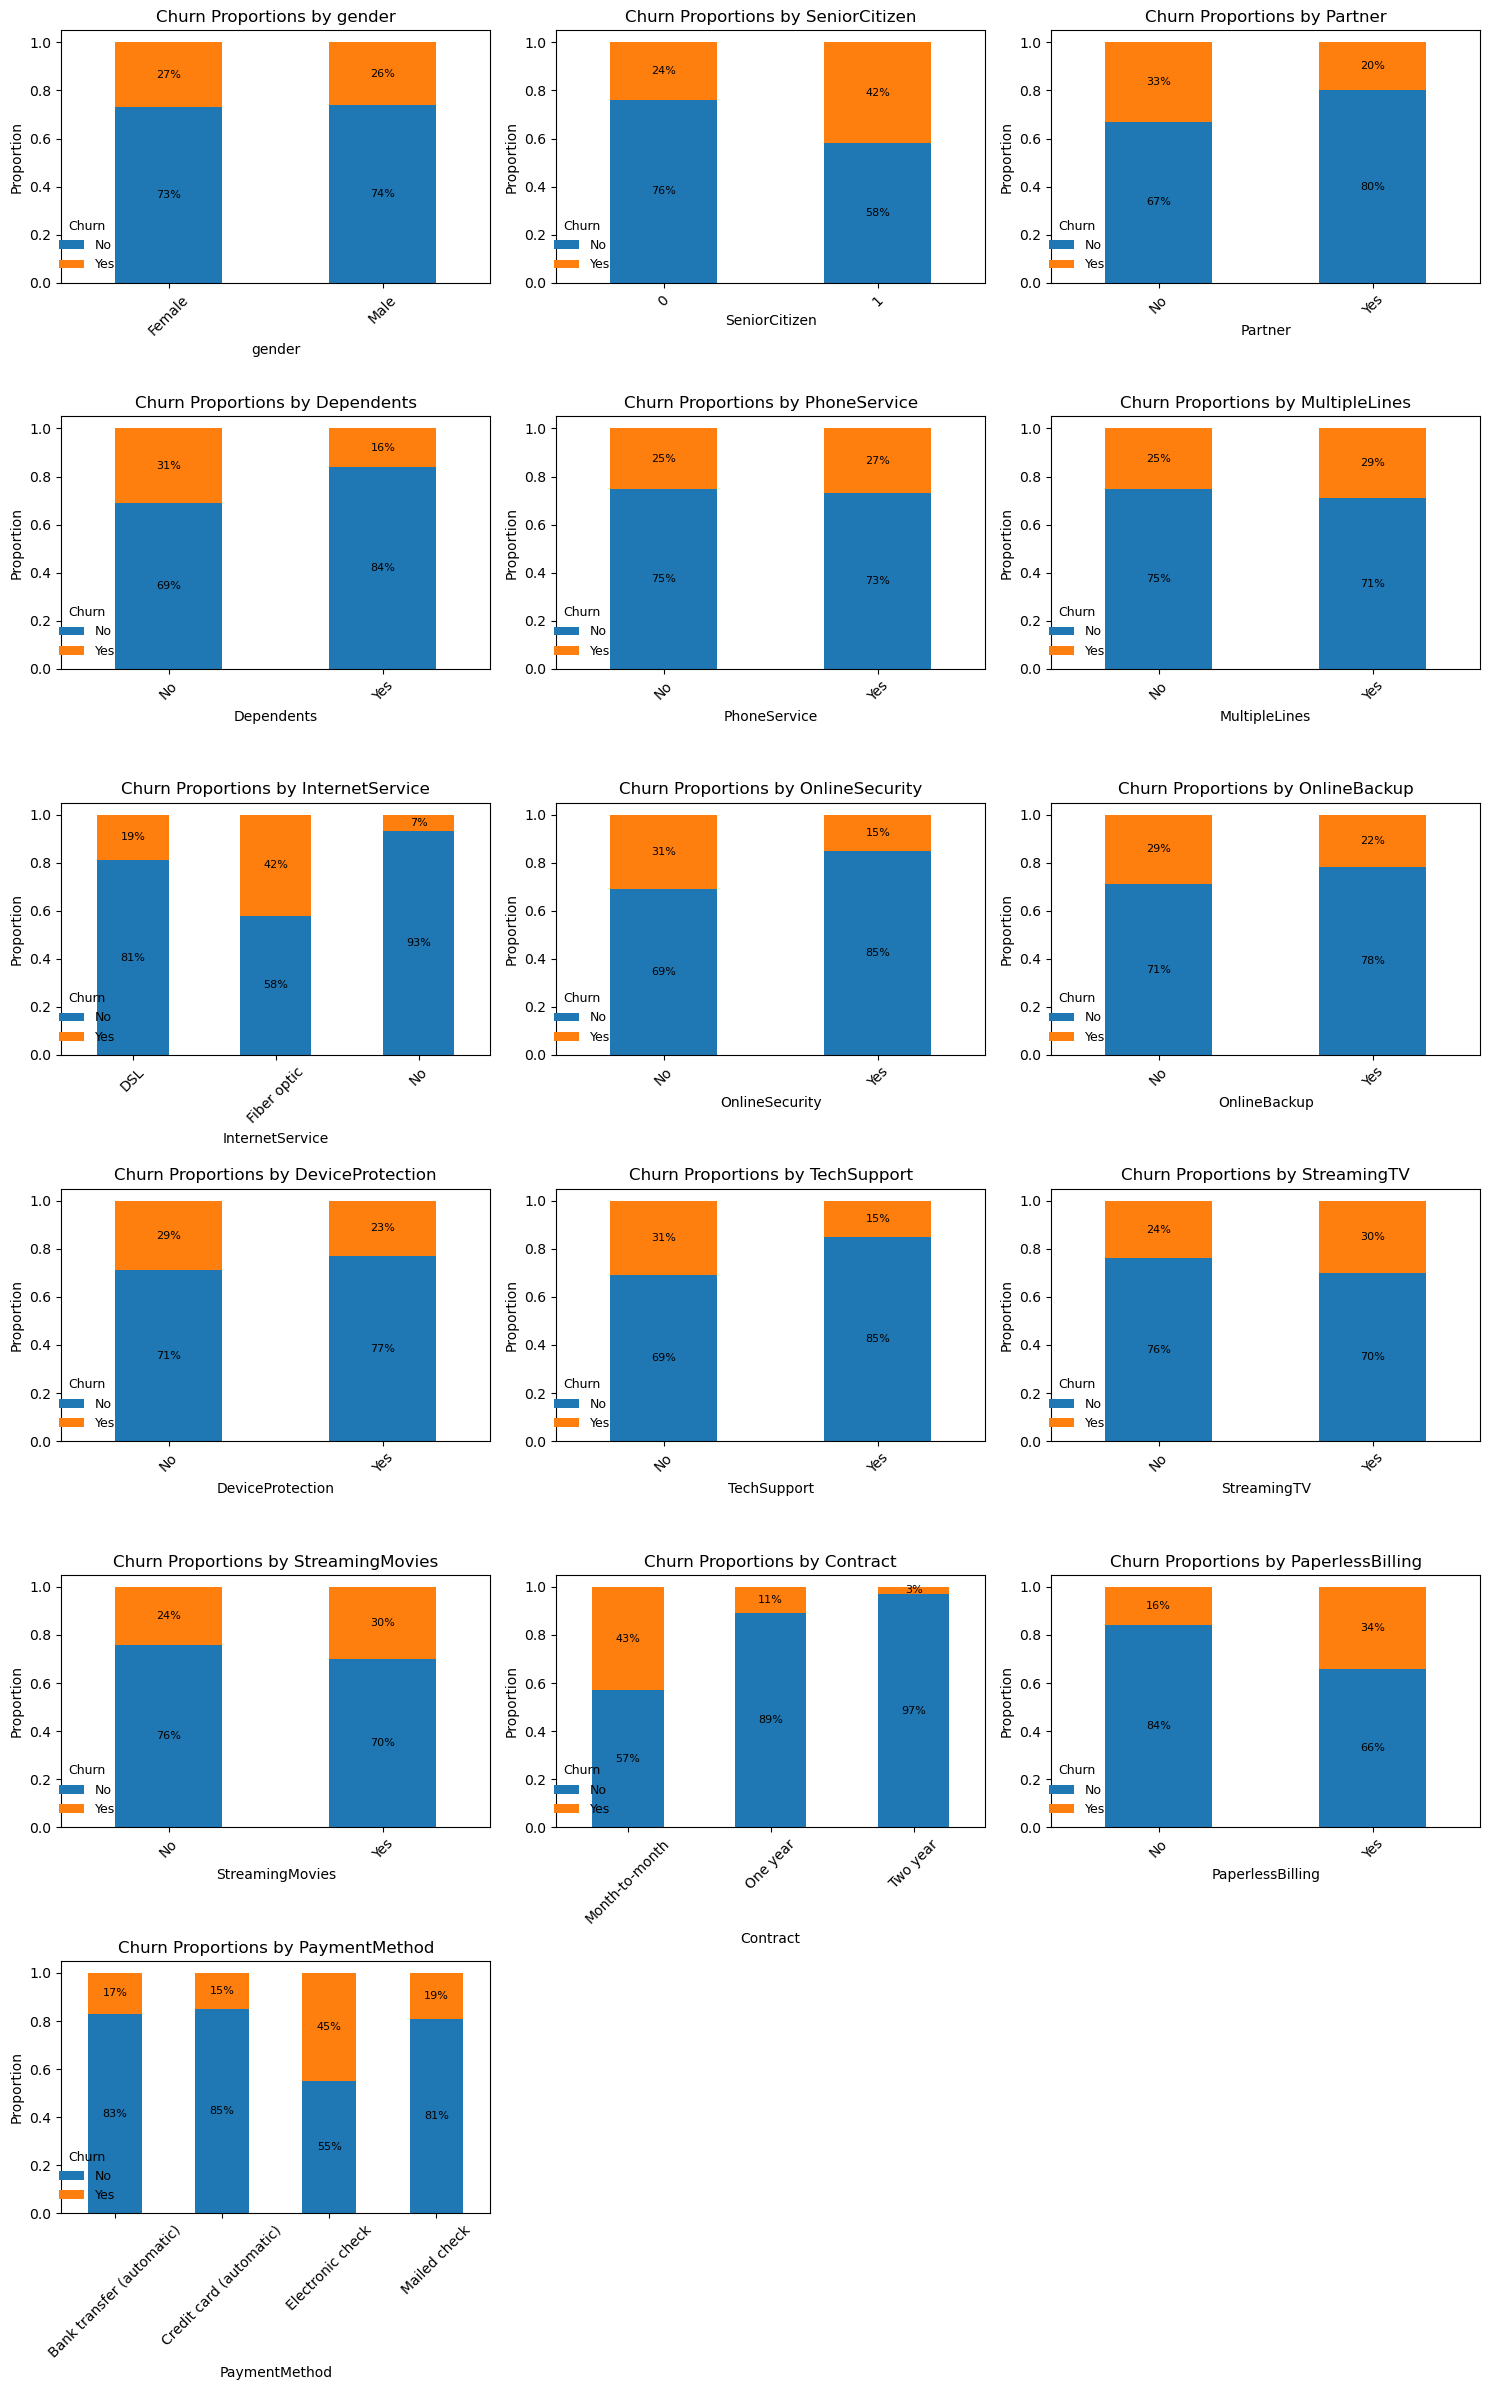

In [56]:
# display the proportion of churned customers by category

import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

cat_features = list(categorical_columns.drop('Churn'))
n = len(cat_features)
ncols = 3
nrows = math.ceil(n / ncols)

plt.figure(figsize=(ncols * 5, nrows * 4))

for i, col in enumerate(cat_features, 1):
    # cross tabulation (frequency table) for categorical variables and the target response
    # this computes row wise proportions of churned customer for each categorical variable
    # Churn values are no or yes
    crosstab = pd.crosstab(df[col], df['Churn'], normalize='index').round(2)
    for val in ['No', 'Yes']:
        if val not in crosstab.columns:
            crosstab[val] = 0.0
    crosstab = crosstab[['No', 'Yes']]

    #setting up bar subplots
    ax = plt.subplot(nrows, ncols, i)
    crosstab.plot(kind='bar', stacked=True, ax=ax, legend=True)

    # Display proportions as percentages in the bars
    # Measure the height of the bars
    # Make the percentages appear in the middle of the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0.01:
            ax.annotate(f'{height:.0%}',
                        (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                        ha='center', va='center', fontsize=8, color='black')

    # label the plots
    ax.set_title(f'Churn Proportions by {col}')
    ax.set_ylabel('Proportion')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Churn', labels=['No', 'Yes'],
              loc='lower center', bbox_to_anchor=(0.06, 0),
              fontsize=9, title_fontsize=9, frameon=False)
    
plt.tight_layout()
plt.show()


# Chi-Squared Association Test for Categorical Variables

In [71]:
from scipy.stats import chi2_contingency
# display the chi-square statistic, p-value, and degrees of freedom in a table
chi2_results = []

for col in categorical_columns:
    if col != 'Churn':
        table = pd.crosstab(df[col], df['Churn'])
        chi2, p, dof, expected = chi2_contingency(table)
        chi2_results.append({
            'Feature': col,
            'Chi2': round(chi2, 4),
            'p-value': round(p, 4),
            'Degrees of Freedom': dof
        })

chi2_df = pd.DataFrame(chi2_results)
chi2_df = chi2_df.sort_values('p-value')

chi2_df

,Feature,Chi2,p-value,Degrees of Freedom
1,SeniorCitizen,158.4408,0.0000,1
2,Partner,157.5032,0.0000,1
3,Dependents,186.3216,0.0000,1
6,InternetService,728.6956,0.0000,2
7,OnlineSecurity,205.4158,0.0000,1
8,OnlineBackup,47.2467,0.0000,1
9,DeviceProtection,30.4957,0.0000,1
10,TechSupport,189.9668,0.0000,1
11,StreamingTV,27.8419,0.0000,1
12,StreamingMovies,25.7641,0.0000,1


# Data Visualization for Continuous Variables

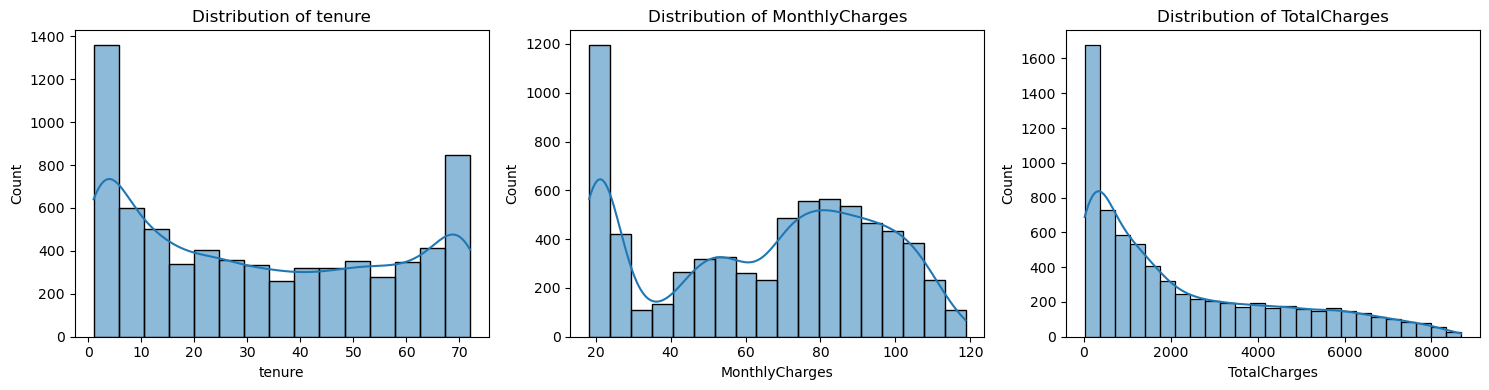

In [83]:
# Histograms of the distributions of the continuous variables
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numerical columns, which are the continuous variables
numerical_cols = df.select_dtypes(include='number').columns

# Number of columns to plot
n = len(numerical_cols)

# Grid setup
ncols = 3
nrows = math.ceil(n / ncols)

# plot histograms for each column
plt.figure(figsize=(ncols * 5, nrows * 4))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Correlation Matrix
                   tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


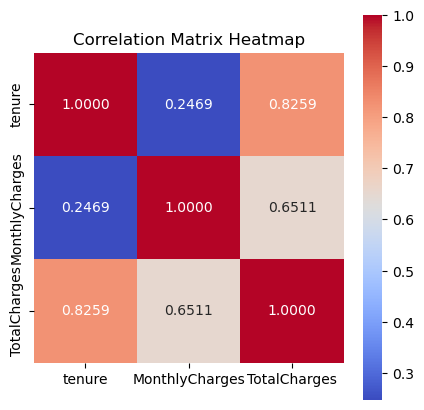

In [81]:
# select only continuous features from the dataset for the correlation matrix
corr_features = df.select_dtypes(include=['int64', 'float64'])

# use pearson correlation as data is continuous and appears normally distributed
corr_matrix = corr_features.corr(method='pearson')

print("Correlation Matrix\n", corr_matrix)

# Display the heatmap with the correlations values
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, annot = True, fmt = '.4f')
plt.title('Correlation Matrix Heatmap')
plt.show()

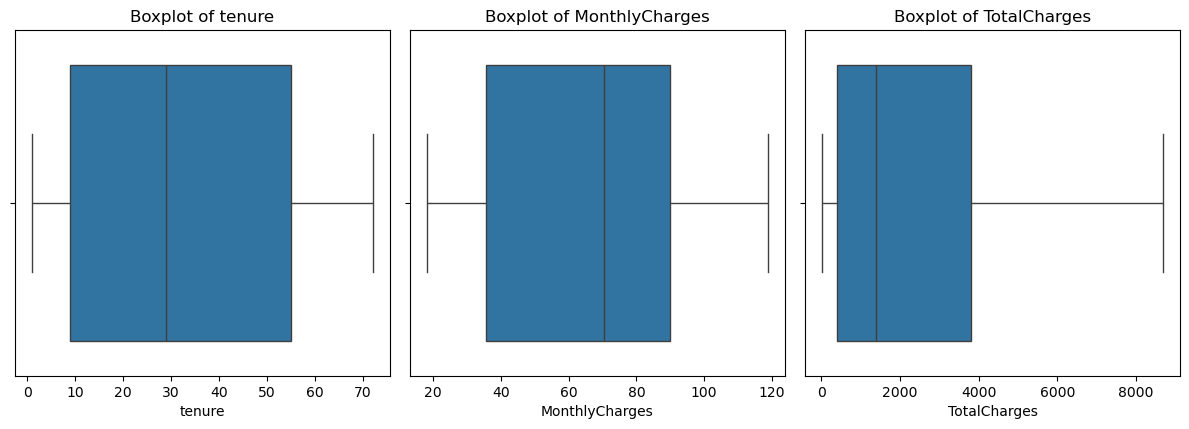

In [75]:
# Plot boxplots to check for outliers and distribution of continuous variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


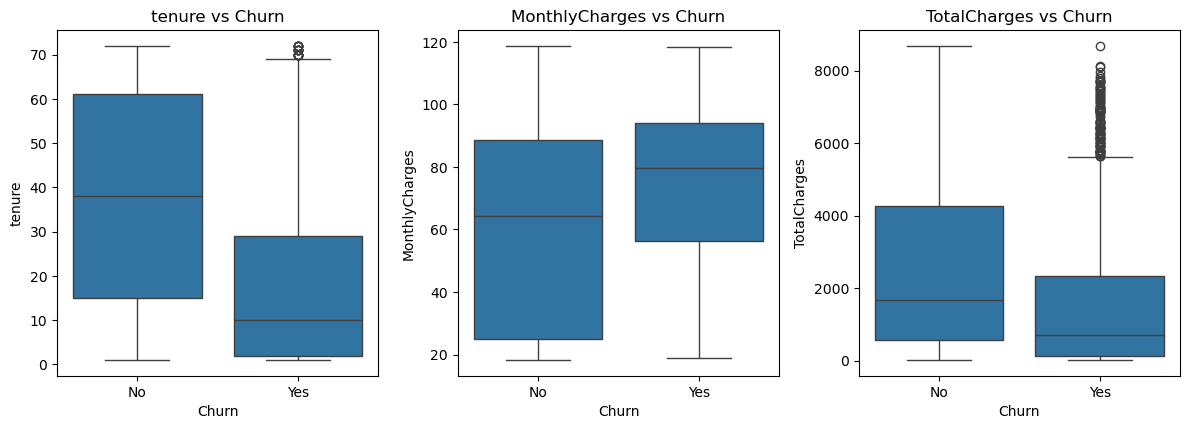

In [77]:
# boxplots to visualize any difference between churned customers and customers who stayed for continuous variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
plt.show()


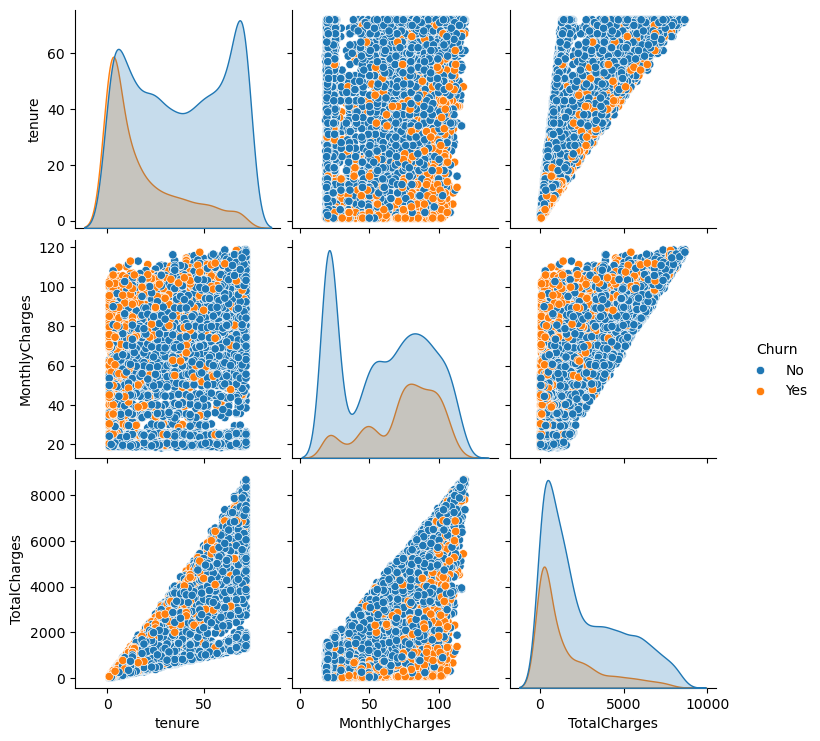

In [191]:
# Pairplots showing scatter plots and distributions for each pair of continuous variables
sns.pairplot(df, vars=numerical_cols, hue='Churn')
plt.show()

# Summary Statistics for Continuous Variables

In [85]:
# Summary statistics for numerical columns
numerical_cols = df.select_dtypes(include='number').columns
print(df[numerical_cols].describe())


            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000
